In [ ]:
import numpy as np
%tensorflow_version 2.x
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# IMPORTING DATA FROM DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2

from google.colab import drive


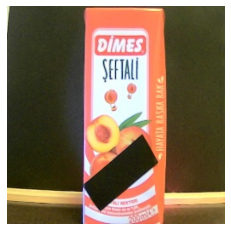

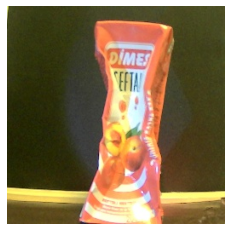

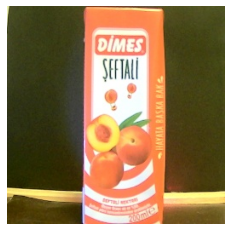

In [ ]:
#DISPLAYING IMAGES
y=[]
DATADIR = r"drive/MyDrive/automation_dataset"
CATEGORIES = ["stained","pressed","flawless"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        y.append(category)

        plt.axis("off")
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break


In [ ]:
# CREATING TRAINING DATA SET
IMG_SIZE=200

X, y = [], []
def create_training_data():
    for category in CATEGORIES:
        print(category)
        path = os.path.join(DATADIR, category)
        class_num= CATEGORIES.index(category)

        for img in os.listdir(path):

            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                X.append(new_array)
                y.append(class_num)

            except Exception as e:
                pass

create_training_data()

stained
pressed
flawless


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(np.reshape(y, (-1,1)))
y = y.toarray()

In [ ]:
np.unique([np.argmax(item) for item in y], return_counts=True)

(array([0, 1, 2]), array([1000, 1001, 1002]))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pickle
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()

datagen = ImageDataGenerator(

    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
    )



train_generator = datagen.flow(np.array(X), np.array(y),subset='training')
validation_generator = datagen.flow(np.array(X), np.array(y),subset='validation')

test_generator = datagen.flow(np.array(X_test), np.array(y_test))

In [ ]:
#MODEL ARCHITECTURE AND TRAINING
model.add(Conv2D(4, (3, 3), input_shape=np.shape(X)[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())


model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())


model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())



model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())



model.add(Flatten())
model.add(Dense(256))

model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model.summary()

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 10,
    validation_data = validation_generator,
    validation_steps = 10,
    epochs = 50)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
10/10 [==============================] - 6s 603ms/step - loss: 0.8131 - accuracy: 0.6375 - val_loss: 0.4993 - val_accuracy: 0.9594
Epoch 2/50
10/10 [==============================] - 5s 554ms/step - loss: 0.4409 - accuracy: 0.8813 - val_loss: 0.3928 - val_accuracy: 0.9375
Epoch 3/50
10/10 [==============================] - 5s 552ms/step - loss: 0.3097 - accuracy: 0.8875 - val_loss: 0.4847 - val_accuracy: 0.7906
Epoch 4/50
10/10 [==============================] - 5s 561ms/step - loss: 0.1906 - accuracy: 0.9344 - val_loss: 0.5122 - val_accuracy: 0.7719
Epoch 5/50
10/10 [==============================] - 5s 556ms/step - loss: 0.1544 - accuracy: 0.9406 - val_loss: 0.4507 - val_accuracy: 0.8156
Epoch 6/50
10/10 [==============================] - 5s 558ms/step - loss: 0.1837 - accuracy: 0.9219 - val_loss: 0.4167 - val_accuracy: 0.8188
Epoch 7/50
10/10 [==============================] - 5s 536ms/step - loss: 0.1221 - accuracy: 0.9656 - val_loss: 0.6393 - val_accuracy: 0.6094
Epoch 

In [ ]:
#TESTING DATA
scores = model.evaluate_generator(test_generator,10)
print("Accuracy = ", scores[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Accuracy =  0.9937499761581421


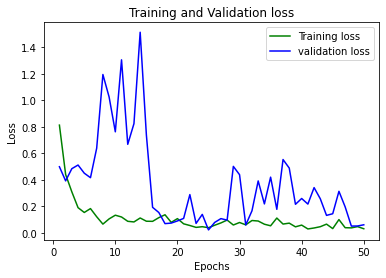

In [ ]:
 #PLOTS
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,len(loss_train)+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


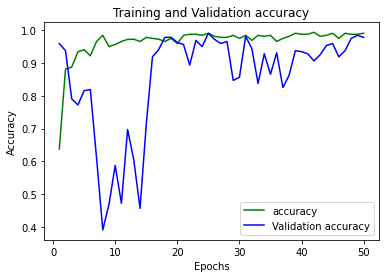

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,len(loss_train)+1)
plt.plot(epochs, loss_train, 'g', label='accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
 from sklearn.metrics import classification_report
ytrue = np.concatenate([test_generator.next()[1] for i in range(test_generator.__len__())])
ytrue = [np.argmax(item) for item in ytrue]
ypred = [np.argmax(item) for item in model.predict(test_generator)]
print(classification_report(ytrue, ypred))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       214
           1       1.00      1.00      1.00       178
           2       0.99      1.00      1.00       209

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



In [ ]:
from tensorflow.keras.optimizers import Adadelta
model.add(Conv2D(4, (3, 3), input_shape=np.shape(X)[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())


model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())


model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())



model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())



model.add(Flatten())
model.add(Dense(256))

model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])
# model.summary()

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 10,
    validation_data = validation_generator,
    validation_steps = 10,
    epochs = 20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
10/10 [==============================] - 10s 943ms/step - loss: 1.1953 - accuracy: 0.3313 - val_loss: 1.0954 - val_accuracy: 0.3906
Epoch 2/20
10/10 [==============================] - 6s 650ms/step - loss: 1.1842 - accuracy: 0.3187 - val_loss: 1.0910 - val_accuracy: 0.4812
Epoch 3/20
10/10 [==============================] - 6s 652ms/step - loss: 1.2214 - accuracy: 0.2937 - val_loss: 1.0847 - val_accuracy: 0.4500
Epoch 4/20
10/10 [==============================] - 6s 649ms/step - loss: 1.2012 - accuracy: 0.2719 - val_loss: 1.0776 - val_accuracy: 0.4000
Epoch 5/20
10/10 [==============================] - 6s 648ms/step - loss: 1.1911 - accuracy: 0.2688 - val_loss: 1.0776 - val_accuracy: 0.3969
Epoch 6/20
10/10 [==============================] - 6s 649ms/step - loss: 1.1805 - accuracy: 0.3156 - val_loss: 1.0649 - val_accuracy: 0.4000
Epoch 7/20
10/10 [==============================] - 6s 654ms/step - loss: 1.1823 - accuracy: 0.3281 - val_loss: 1.0861 - val_accuracy: 0.3250
Epoch

### TESTING

In [ ]:
import os
import cv2
path1='drive/MyDrive/automation_dataset'
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


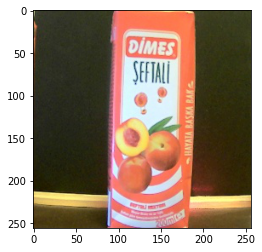

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Read Images
img = mpimg.imread(path1+'/stained/stained_3.jpg')
img2 = mpimg.imread(path1+'/pressed/pressed_3.jpg')
img3 = mpimg.imread(path1+'/flawless/flawless_3.jpg')
# Output Images
plt.imshow(img)
plt.imshow(img2)
plt.imshow(img3)

In [ ]:
import os
import cv2
IMG_SIZE=200
img_array = cv2.imread(path1+'/stained/stained_3.jpg', cv2.COLOR_BGR2RGB)
img_array2 = cv2.imread(path1+'/pressed/pressed_3.jpg', cv2.COLOR_BGR2RGB)
img_array3 = cv2.imread(path1+'/flawless/flawless_3.jpg', cv2.COLOR_BGR2RGB)
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
new_array2 = cv2.resize(img_array2, (IMG_SIZE, IMG_SIZE))
new_array3 = cv2.resize(img_array3, (IMG_SIZE, IMG_SIZE))

In [ ]:
probabilities= model.predict(np.reshape(new_array, (1,200,200,3)),steps=1)

In [ ]:
print(np.argmax(model.predict(np.reshape(new_array, (1,200,200,3)),steps=1)))
print(np.argmax(model.predict(np.reshape(new_array2, (1,200,200,3)),steps=1)))
print(np.argmax(model.predict(np.reshape(new_array3, (1,200,200,3)),steps=1)))

0
1
2


### TESTING ON A DIFFERENT IMAGE

In [ ]:
import os
import cv2
path1='drive/MyDrive/'
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


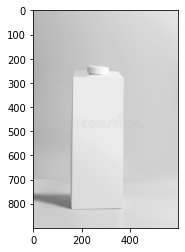

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Read Images
img = mpimg.imread(path1+'/white-packaging-tetra-pack-standing-light-gray-background-front-view-empty-template-box-milk-juice-package-branding-mock-up-138351883.jpeg')

# Output Images
plt.imshow(img)
# Penasol-Tinto-Wine-Tetra-Pack-1ltr.jpeg

In [ ]:
import os
import cv2
IMG_SIZE=200
img_array = cv2.imread(path1+'/white-packaging-tetra-pack-standing-light-gray-background-front-view-empty-template-box-milk-juice-package-branding-mock-up-138351883.jpeg', cv2.COLOR_BGR2RGB)

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))


In [ ]:
probabilities=model.predict(np.reshape(new_array, (1,200,200,3)),steps=1)

In [ ]:
pr = np.argmax(model.predict(np.reshape(new_array, (1,200,200,3)),steps=1))

In [ ]:
pred=np.argmax(probabilities)
print(pred)

2


flawless


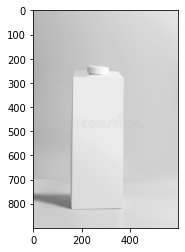

In [ ]:
names=['stained','pressed','flawless']
print(names[pr])
plt.imshow(img)